In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from scipy import stats

Исходной выборкой принята X, входными данными выбраны In1, In3

In [8]:
df = pd.read_excel('X_dat.xlsx')
Param = ['Tsys','OutK','OutW','In2','In4','In5']

In [9]:
df

,Tsys,OutW,OutK,In1,In2,In3,In4,In5
0,14260.207347,-4.372067,1.684068,-90.0,5092.174480,7.568569,7.603383,2.766608e-05
1,17860.113750,-4.395031,1.684086,-90.0,5092.248508,7.733917,7.755043,3.147119e-06
2,21460.017344,-4.396948,1.684095,-90.0,5092.285155,7.800454,7.824474,5.493316e-14
3,25059.939097,-4.466899,1.684189,-90.0,5092.464156,8.715562,8.791684,2.609611e-04
4,28659.869252,-4.604535,1.684474,-90.0,5093.527380,11.173874,11.232197,2.440854e-04
...,...,...,...,...,...,...,...,...
3955,295048.236700,-4.897853,1.688830,90.0,5108.666008,47.109053,47.114855,6.614512e-07
3956,302247.830955,-4.861724,1.688830,90.0,5108.667969,47.111374,47.105139,-1.626975e-13
3957,291448.434283,-4.869514,1.688830,90.0,5108.660645,47.111704,47.118901,3.904407e-13
3958,298648.048146,-4.890650,1.688830,90.0,5108.666992,47.113201,47.122764,1.298018e-13


В ходе выполнения работы было решено использовать сортировку исходных данных по полю времени Tsys, тем самым апроксимируется "большой эксперимент", а не множество повторящиюхся. Это возможно так как испытания многократно проводились при одинаковых условиях (допущение). Данные разделены в соотношении 70%:30% для обучающей и тестовой выборки, также проведено мин-макс масштабирование целевых функций [0;1]

In [10]:
train, test = np.split(df.sample(frac=1, random_state=3), [int(.75*len(df))])

train = train.sort_values(by=['Tsys'])
test =  test.sort_values(by=['Tsys'])
target_data_K = train.OutK
target_test_K = test.OutK
"""
target_data_W = train.OutW
target_test_W = test.OutW

target_data_W = (train.OutW - train.OutW.min()) / (train.OutW.max() - train.OutW.min())
target_data_K = (train.OutK - train.OutK.min()) / (train.OutK.max() - train.OutK.min())

target_test_W = (test.OutW - test.OutW.min()) / (test.OutW.max() - test.OutW.min())
target_test_K = (test.OutK - test.OutK.min()) / (test.OutK.max() - test.OutK.min())
"""
train = train.drop(Param, axis=1)
train_in1 = train[train.columns[0]]
train_in2 = train[train.columns[1]]

test = test.drop(Param, axis=1)
test_in1 = test[test.columns[0]]
test_in2 = test[test.columns[1]]

In [11]:
q_low = df["OutW"].quantile(0.1)
q_hi  = df["OutW"].quantile(0.9)

#df_filtered = df[(df["OutW"] < q_hi) & (df["OutW"] > q_low)]

df_filtered = df[(np.abs(stats.zscore(df["OutW"])) < 1.5)]
train_W, test_W = np.split(df_filtered.sample(frac=1, random_state=3), [int(.75*len(df_filtered))])

train_W = train_W.sort_values(by=['Tsys'])
test_W =  test_W.sort_values(by=['Tsys'])

target_data_W = train_W.OutW
target_test_W = test_W.OutW

train_W = train_W.drop(Param, axis=1)
train_in1_W = train_W[train_W.columns[0]]
train_in2_W = train_W[train_W.columns[1]]

test_W = test_W.drop(Param, axis=1)
test_in1_W = test_W[test_W.columns[0]]
test_in2_W = test_W[test_W.columns[1]]

In [12]:
df_filtered

,Tsys,OutW,OutK,In1,In2,In3,In4,In5
0,14260.207347,-4.372067,1.684068,-90.0,5092.174480,7.568569,7.603383,2.766608e-05
1,17860.113750,-4.395031,1.684086,-90.0,5092.248508,7.733917,7.755043,3.147119e-06
2,21460.017344,-4.396948,1.684095,-90.0,5092.285155,7.800454,7.824474,5.493316e-14
3,25059.939097,-4.466899,1.684189,-90.0,5092.464156,8.715562,8.791684,2.609611e-04
4,28659.869252,-4.604535,1.684474,-90.0,5093.527380,11.173874,11.232197,2.440854e-04
...,...,...,...,...,...,...,...,...
3955,295048.236700,-4.897853,1.688830,90.0,5108.666008,47.109053,47.114855,6.614512e-07
3956,302247.830955,-4.861724,1.688830,90.0,5108.667969,47.111374,47.105139,-1.626975e-13
3957,291448.434283,-4.869514,1.688830,90.0,5108.660645,47.111704,47.118901,3.904407e-13
3958,298648.048146,-4.890650,1.688830,90.0,5108.666992,47.113201,47.122764,1.298018e-13


Обучение: Искомый параметр K

In [13]:
ANN_K = MLPRegressor(hidden_layer_sizes=(100,100,), max_iter = int(1e9), activation = 'logistic', solver = 'adam', learning_rate = 'adaptive',tol = 1e-16, random_state = 5)
ANN_K.fit(train,target_data_K)
predict_train_K = ANN_K.predict(train)
predict_test_K = ANN_K.predict(test)

print(f"Ошибки на обучающей выборке параметра K")
print(f"MAE {mean_absolute_error(target_data_K, predict_train_K):.10f}")
print(f"MSE {mean_squared_error(target_data_K, predict_train_K):.10f}")
print(f"MAX {max_error(target_data_K, predict_train_K):.10f}")
print(f"Accuracy {ANN_K.score(train,target_data_K):.10f}")
print(f"\n")
print(f"Ошибки на тестовой выборке параметра K")
print(f"MAE {mean_absolute_error(target_test_K, predict_test_K):.10f}")
print(f"MSE {mean_squared_error(target_test_K, predict_test_K):.10f}")
print(f"MAX {max_error(target_test_K, predict_test_K):.10f}")
print(f"Accuracy {ANN_K.score(test,target_test_K):.10f}")

Ошибки на обучающей выборке параметра K
MAE 0.0010693191
MSE 0.0000018561
MAX 0.0048584974
Accuracy 0.9961420051


Ошибки на тестовой выборке параметра K
MAE 0.0010605430
MSE 0.0000017964
MAX 0.0040087597
Accuracy 0.9962344354


Визуализация поверхностей и сечений по входным параметрам для обучающей выборки

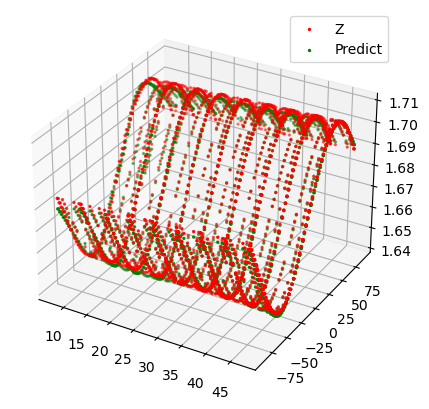

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_in2, train_in1, target_data_K, c = 'red', s = 2, label = 'Z')
ax.scatter(train_in2, train_in1, predict_train_K, c = 'green',  s = 2, label = 'Predict')
ax.legend()

Сечения графиков

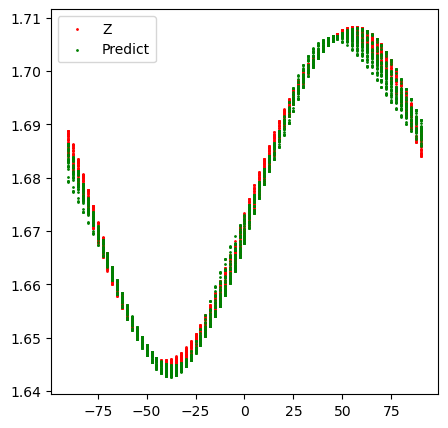

In [15]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in1, target_data_K, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in1, predict_train_K, c='green',  s = 1, label = 'Predict')
plt.legend()

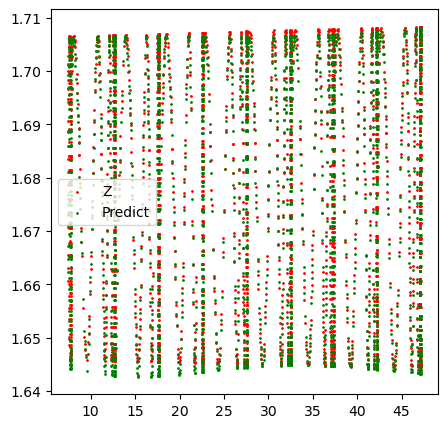

In [16]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in2, target_data_K, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in2, predict_train_K, c='green',  s = 1, label = 'Predict')
plt.legend()

Визуализация поверхностей и сечений по входным параметрам для тестовой выборки

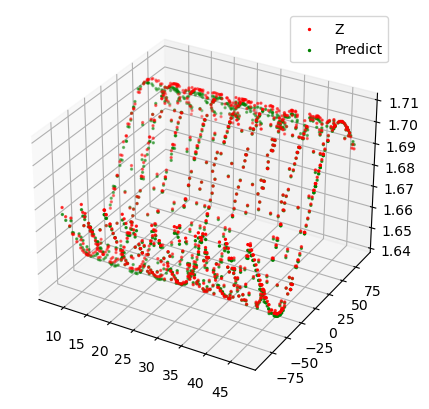

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_in2, test_in1, target_test_K, c = 'red', s = 2, label = 'Z')
ax.scatter(test_in2, test_in1, predict_test_K, c = 'green',  s = 2, label = 'Predict')
ax.legend()

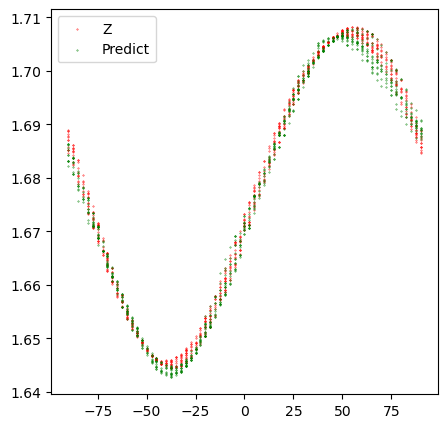

In [18]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in1, target_test_K, c = 'red', s = 0.1, label = 'Z')
plt.scatter(test_in1, predict_test_K, c='green',  s = 0.1, label = 'Predict')
plt.legend()

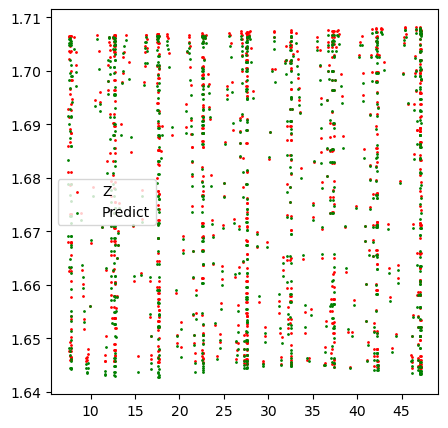

In [19]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in2, target_test_K, c = 'red', s = 1, label = 'Z')
plt.scatter(test_in2, predict_test_K, c='green',  s = 1, label = 'Predict')
plt.legend()

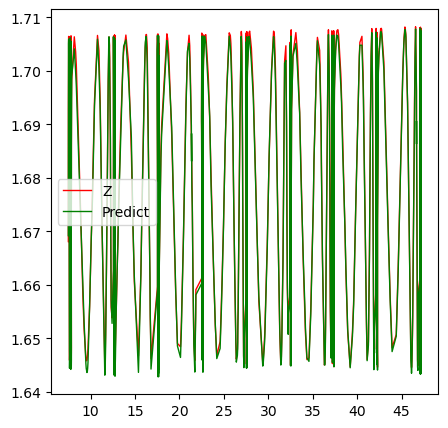

In [20]:
fig = plt.figure(figsize=(5,5))
plt.plot(test_in2, target_test_K, c = 'red', linewidth = 1, label = 'Z')
plt.plot(test_in2, predict_test_K, c='green',  linewidth = 1, label = 'Predict')
plt.legend()

Ниже проведена аналогичная работа для параметра W.

In [21]:
ANN_W = MLPRegressor(max_iter = int(1e24), activation = 'logistic', solver = 'lbfgs', learning_rate = 'adaptive',tol = 1e-16, random_state = 5)
ANN_W.fit(train_W,target_data_W)
predict_train_W = ANN_W.predict(train_W)
predict_test_W = ANN_W.predict(test_W)

print(f"Ошибки на обучающей выборке параметра W")
print(f"MAE {mean_absolute_error(target_data_W, predict_train_W):.10f}")
print(f"MSE {mean_squared_error(target_data_W, predict_train_W):.10f}")
print(f"MAX {max_error(target_data_W, predict_train_W):.10f}")
print(f"Accuracy {ANN_W.score(train_W,target_data_W):.10f}\n")
print(f"Ошибки на тестовой выборке параметра W")
print(f"MAE {mean_absolute_error(target_test_W, predict_test_W):.10f}")
print(f"MSE {mean_squared_error(target_test_W, predict_test_W):.10f}")
print(f"MAX {max_error(target_test_W, predict_test_W):.10f}")
print(f"Accuracy {ANN_W.score(test_W,target_test_W):.10f}")

Ошибки на обучающей выборке параметра W
MAE 0.0941788083
MSE 0.0146296511
MAX 0.4681291987
Accuracy 0.9382555644

Ошибки на тестовой выборке параметра W
MAE 0.0973309568
MSE 0.0159148409
MAX 0.4988794675
Accuracy 0.9360170906


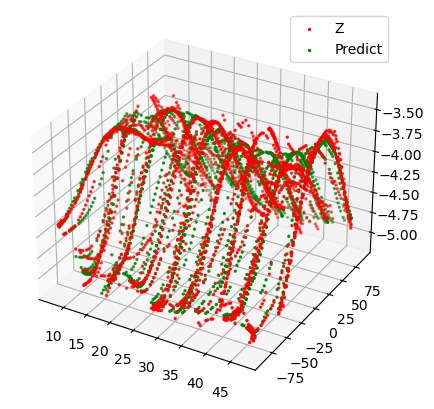

In [22]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_in2_W, train_in1_W, target_data_W, c = 'red', s = 2, label = 'Z')
ax.scatter(train_in2_W, train_in1_W, predict_train_W, c = 'green',  s = 2, label = 'Predict')
ax.legend()

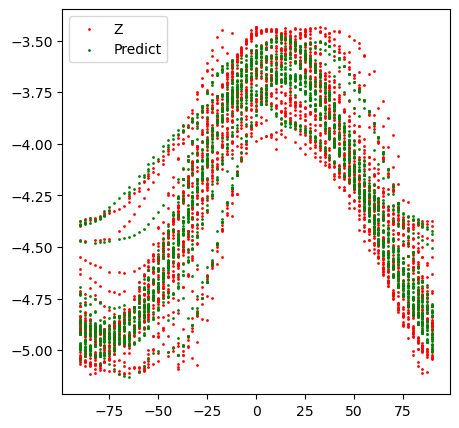

In [23]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in1_W, target_data_W, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in1_W, predict_train_W, c='green',  s = 1, label = 'Predict')
plt.legend()

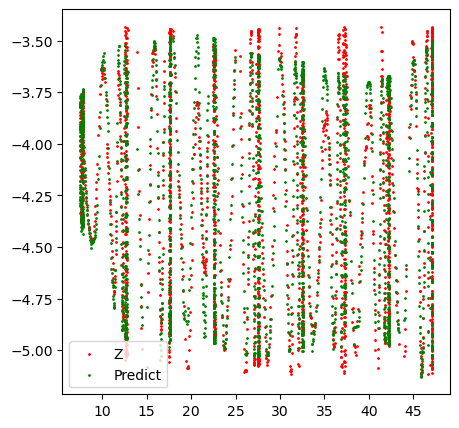

In [24]:
fig = plt.figure(figsize=(5,5))
plt.scatter(train_in2_W, target_data_W, c = 'red', s = 1, label = 'Z')
plt.scatter(train_in2_W, predict_train_W, c='green',  s = 1, label = 'Predict')
plt.legend()

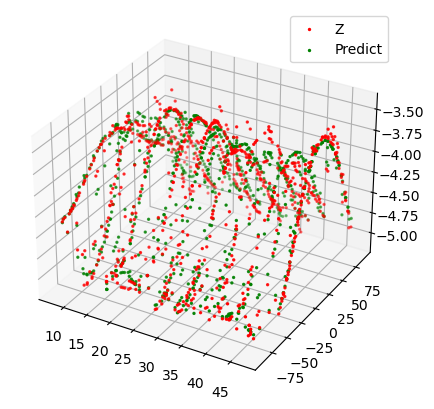

In [25]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(test_in2_W, test_in1_W, target_test_W, c='red', s=2, label='Z')
ax.scatter(test_in2_W, test_in1_W, predict_test_W, c='green', s=2, label='Predict')
ax.legend()

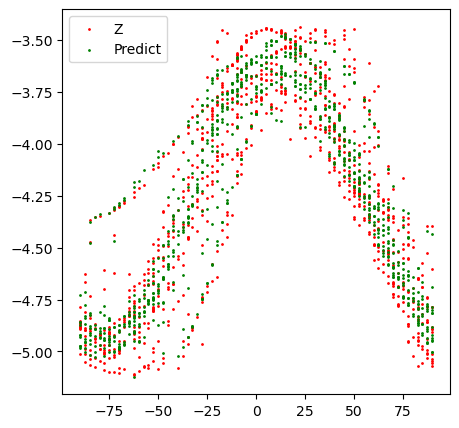

In [26]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in1_W, target_test_W, c = 'red', s = 1, label = 'Z')
plt.scatter(test_in1_W, predict_test_W, c='green',  s = 1, label = 'Predict')
plt.legend()

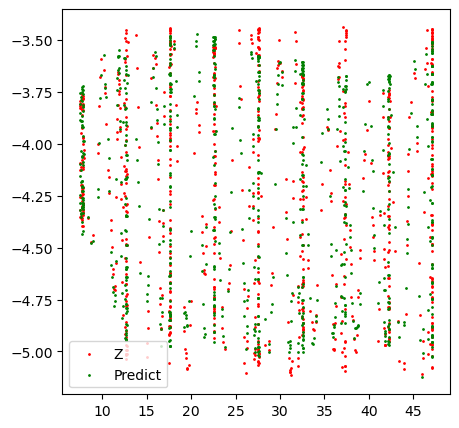

In [27]:
fig = plt.figure(figsize=(5,5))
plt.scatter(test_in2_W, target_test_W, c = 'red', s = 1, label = 'Z')
plt.scatter(test_in2_W, predict_test_W, c='green',  s = 1, label = 'Predict')
plt.legend()

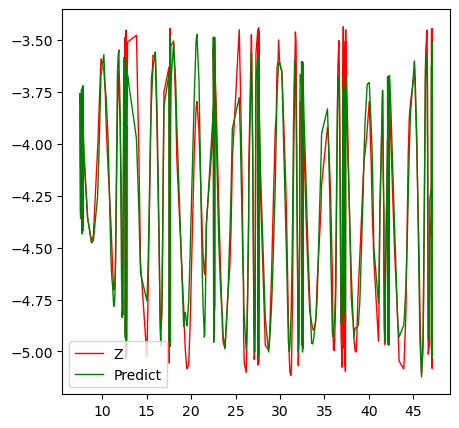

In [28]:
fig = plt.figure(figsize=(5,5))
plt.plot(test_in2_W, target_test_W, c = 'red', linewidth = 1, label = 'Z')
plt.plot(test_in2_W, predict_test_W, c='green',  linewidth = 1, label = 'Predict')
plt.legend()